In [67]:
import keras 
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.api.layers import Dense, Flatten, GlobalAveragePooling2D

from keras.api.applications.resnet50 import ResNet50, preprocess_input


In [68]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [69]:
# x_train = x_train[:10000]
# y_train = y_train[:10000]
# x_test = x_test[:2000]
# y_test = y_test[:2000]

In [70]:
y_train[3]

array([4], dtype=uint8)

In [71]:
train_images = x_train.astype('float32')
train_images = preprocess_input(train_images)

In [72]:
test_images = x_test.astype('float32')
test_images = preprocess_input(test_images)

In [73]:
input = keras.layers.Input(shape=(32,32,3))

up_sampled = keras.layers.UpSampling2D(size=(7,7))(input)

model_conv = ResNet50(weights='imagenet',
                      include_top=False,
                      input_shape=(224,224,3))

conv_output = model_conv(up_sampled)

x = GlobalAveragePooling2D()(conv_output)
x = Flatten()(x)
x = Dense(units=1024, activation='relu')(x)
x = Dense(units=512, activation='relu')(x)
output = Dense(units=10, activation='softmax')(x)


network = keras.models.Model(inputs=input, outputs=output)

In [74]:
network.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_3 (UpSampling2D)  │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,215,818 (100.01 MB)

 Trainable params: 26,162,698 (99.80 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [75]:
network.compile(loss= 'sparse_categorical_crossentropy',
                optimizer=keras.optimizers.Adam(learning_rate=0.0001),
                metrics=['accuracy'])

In [85]:
EPOCHS = 4

In [86]:
history = network.fit(train_images,
                      y_train,
                      epochs=EPOCHS,
                      validation_data=(test_images, y_test),
                      batch_size=32)

Epoch 1/4
313/313 ━━━━━━━━━━━━━━━━━━━━ 55s 177ms/step - accuracy: 0.9709 - loss: 0.0849 - val_accuracy: 0.8595 - val_loss: 0.5243
Epoch 2/4
313/313 ━━━━━━━━━━━━━━━━━━━━ 54s 173ms/step - accuracy: 0.9754 - loss: 0.0825 - val_accuracy: 0.8750 - val_loss: 0.4496
Epoch 3/4
313/313 ━━━━━━━━━━━━━━━━━━━━ 54s 172ms/step - accuracy: 0.9773 - loss: 0.0814 - val_accuracy: 0.8775 - val_loss: 0.4918
Epoch 4/4
313/313 ━━━━━━━━━━━━━━━━━━━━ 55s 174ms/step - accuracy: 0.9775 - loss: 0.0634 - val_accuracy: 0.8715 - val_loss: 0.5089


In [87]:
history

In [88]:
loss, accuracy = network.evaluate(test_images, y_test, batch_size=32)

63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.8690 - loss: 0.5194


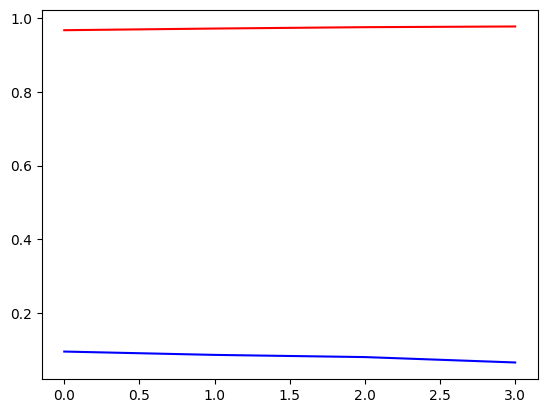

In [89]:
plt.plot(history.history['loss'], color='blue', label='loss')
plt.plot(history.history['accuracy'], color='red', label='accuracy')

In [81]:
probability = network.predict(test_images)
probability = np.argmax(probability, axis= 1)

63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step


In [82]:
probability

array([3, 8, 8, ..., 9, 9, 5])

In [83]:
BATCH_SIZE = 32 
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
def display_images(digits, predictions, labels, title):

  n = 10

  indexes = np.random.choice(len(predictions), size=n)
  n_digits = digits[indexes]
  n_predictions = predictions[indexes]
  n_predictions = n_predictions.reshape((n,))
  n_labels = labels[indexes]
 
  fig = plt.figure(figsize=(20, 4))
  plt.title(title)
  plt.yticks([])
  plt.xticks([])

  for i in range(10):
    ax = fig.add_subplot(1, 10, i+1)
    class_index = n_predictions[i]
    
    plt.xlabel(classes[class_index])
    plt.xticks([])
    plt.yticks([])
    plt.imshow(n_digits[i])

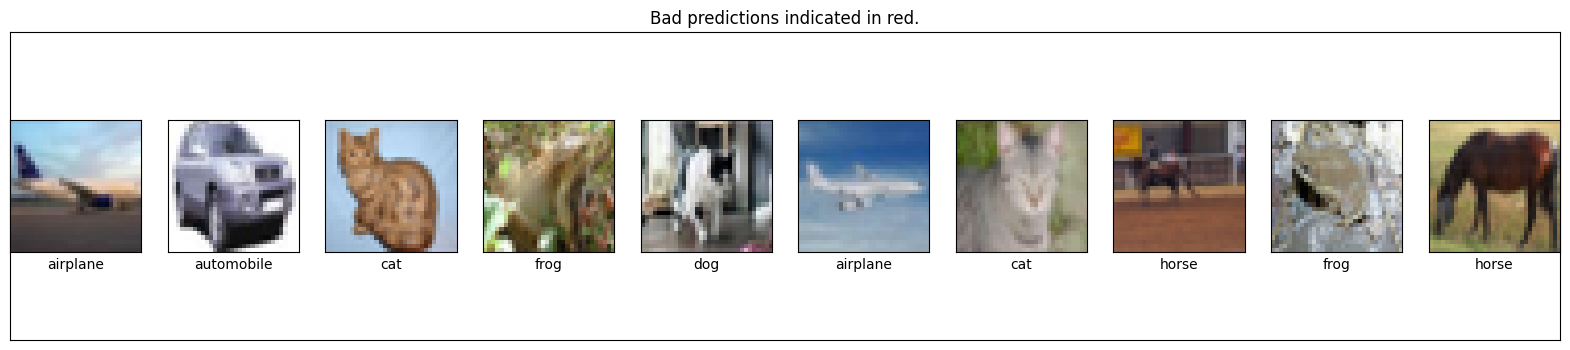

In [84]:
display_images(x_test, probability, y_test, "Bad predictions indicated in red.")